In [15]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
import matplotlib
from matplotlib import pyplot as plt
# sns.set_style("whitegrid")
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [17]:
root_paths=[
    '../results/ERA5v00/ERA5v00_CAE_h32_k5_ReZero_default_none_none',
    '../results/ERA5v00/ERA5v00_CAE_h32_k5_NeuralODE_no_exp_none_none',
    '../results/ERA5v00/ERA5v00_AEflow_b4_k5_ReZero_default_none_none',
    '../results/ERA5v00/ERA5v00_AEflow_b4_k5_NeuralODE_no_exp_none_none',
    '../results/ERA5v00/ERA5v00_SINRv11_default_NeuralODE_no_exp_none_none',
    '../results/ERA5v00/ERA5v00_SINRv11_default_NeuralODE_no_exp_scalar_default',
    '../results/ERA5v00/ERA5v00_SINRv11_default_NeuralODE_no_exp_diagonal_default',
]

In [18]:

import glob

df = pd.concat(
    [
    pd.concat(
        [pd.read_pickle(f) 
         for f in glob.glob(root_path + "/*dataframe.pkl")],
        ignore_index=True)
    for root_path in root_paths
],
    ignore_index=True)
df

,kf_name,step,feature_idx,rmse,ed_name,ld_name,ue_name,ens_num,infl,sigma_z_b,sigma_m
0,EnKF,0,0,0.061281,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.01
1,EnKF,0,1,0.107945,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.01
2,EnKF,1,0,0.062640,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.01
3,EnKF,1,1,0.108514,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.01
4,EnKF,2,0,0.064279,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.01
...,...,...,...,...,...,...,...,...,...,...,...
1277575,ETKF-Q,196,1,0.315706,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.05,NaN,NaN
1277576,ETKF-Q,197,0,0.352817,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.05,NaN,NaN
1277577,ETKF-Q,197,1,0.314680,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.05,NaN,NaN
1277578,ETKF-Q,198,0,0.353735,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.05,NaN,NaN


# Renaming

In [19]:
df[df == 'CAE_h32_k5'] = 'CAE'
df[df == 'AEflow_b4_k5'] = 'AEflow'
df[df == 'SINRv11_default'] = 'SINR'

df[df == 'ReZero_default'] = '+ReZero'
df[df == 'NeuralODE_no_exp'] = '+NeuralODE'
df[df == 'none_none'] = ''
df[df == 'diagonal_default'] = '+diagonal'
df[df == 'scalar_default'] = '+scalar'

In [20]:
df['model'] = df['ed_name'] + df['ld_name'] + df['ue_name']

# df['model'] = df['ed_name'] + '+' + df['ld_name'] + '+' + df['ue_name']
# df[df == 'CAE+ReZero+none'] = 'CAE+ReZero'
# df[df == 'SINR+NeuralODE+none'] = 'SINR+NeuralODE (LAINR, ours)'
# df[df == 'SINR+NeuralODE+diagonal'] = 'SINR+NeuralODE w/ est. (LAINR, ours)'
df.drop(columns=['ed_name', 'ld_name', 'ue_name'], inplace=True)
print('#trajs:', len(df) / 199 / 2)
df

#trajs: 3210.0


,kf_name,step,feature_idx,rmse,ens_num,infl,sigma_z_b,sigma_m,model
0,EnKF,0,0,0.061281,32,1.05,0.03,0.01,CAE+ReZero
1,EnKF,0,1,0.107945,32,1.05,0.03,0.01,CAE+ReZero
2,EnKF,1,0,0.062640,32,1.05,0.03,0.01,CAE+ReZero
3,EnKF,1,1,0.108514,32,1.05,0.03,0.01,CAE+ReZero
4,EnKF,2,0,0.064279,32,1.05,0.03,0.01,CAE+ReZero
...,...,...,...,...,...,...,...,...,...
1277575,ETKF-Q,196,1,0.315706,32,1.05,NaN,NaN,SINR+NeuralODE+diagonal
1277576,ETKF-Q,197,0,0.352817,32,1.05,NaN,NaN,SINR+NeuralODE+diagonal
1277577,ETKF-Q,197,1,0.314680,32,1.05,NaN,NaN,SINR+NeuralODE+diagonal
1277578,ETKF-Q,198,0,0.353735,32,1.05,NaN,NaN,SINR+NeuralODE+diagonal


In [21]:
df['sigma_z_b'].fillna(-1, inplace=True)
df['sigma_m'].fillna(-1, inplace=True)
df_grouped = df.groupby(['ens_num', 'model', 'infl', 'sigma_z_b', 'sigma_m', 'kf_name'])['rmse'].mean()
print('trajs:', len(df) / 199 / 2)
print(f'{len(df_grouped)=}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_grouped)
# df

trajs: 3210.0
len(df_grouped)=3210
ens_num  model                    infl  sigma_z_b  sigma_m  kf_name
32       AEflow+NeuralODE         1.02   0.01       0.0001  DEnKF      0.242737
                                                            ETKF       0.241857
                                                            ETKF-Q     0.243206
                                                            EnKF       0.242553
                                                            SEnKF      0.243337
                                                    0.0003  DEnKF      0.241128
                                                            ETKF       0.237954
                                                            ETKF-Q     0.242854
                                                            EnKF       0.240892
                                                            SEnKF      0.243342
                                                    0.0010  DEnKF      0.238365
                 

In [22]:
df_avg_rmse = df_grouped.reset_index()
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(df_avg_rmse)


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse
0,32,AEflow+NeuralODE,1.02,0.01,0.0001,DEnKF,0.242737
1,32,AEflow+NeuralODE,1.02,0.01,0.0001,ETKF,0.241857
2,32,AEflow+NeuralODE,1.02,0.01,0.0001,ETKF-Q,0.243206
3,32,AEflow+NeuralODE,1.02,0.01,0.0001,EnKF,0.242553
4,32,AEflow+NeuralODE,1.02,0.01,0.0001,SEnKF,0.243337
...,...,...,...,...,...,...,...
3205,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,DEnKF,0.166926
3206,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,ETKF,0.162456
3207,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,ETKF-Q,0.215009
3208,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,EnKF,0.157788


In [23]:
df_avg_rmse['kf_id'] = df_avg_rmse['kf_name'].map({
    'EnKF': 0,
    'SEnKF': 1,
    'DEnKF': 2,
    'ETKF': 3,
    'ETKF-Q': 4,
})
df_avg_rmse.sort_values(by=['kf_id'], kind='stable', inplace=True)
df_avg_rmse = df_avg_rmse.reset_index(drop=True)
with pd.option_context('display.max_rows', 50, 'display.max_columns', None):
    display(df_avg_rmse)

,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse,kf_id
0,32,AEflow+NeuralODE,1.02,0.01,0.0001,EnKF,0.242553,0
1,32,AEflow+NeuralODE,1.02,0.01,0.0003,EnKF,0.240892,0
2,32,AEflow+NeuralODE,1.02,0.01,0.0010,EnKF,0.239294,0
3,32,AEflow+NeuralODE,1.02,0.01,0.0030,EnKF,0.235212,0
4,32,AEflow+NeuralODE,1.02,0.01,0.0100,EnKF,0.226875,0
...,...,...,...,...,...,...,...,...
3205,64,SINR+NeuralODE+diagonal,1.05,-1.00,-1.0000,ETKF-Q,0.260225,4
3206,64,SINR+NeuralODE+diagonal,1.10,-1.00,-1.0000,ETKF-Q,0.250517,4
3207,64,SINR+NeuralODE+scalar,1.02,-1.00,-1.0000,ETKF-Q,0.214244,4
3208,64,SINR+NeuralODE+scalar,1.05,-1.00,-1.0000,ETKF-Q,0.214682,4


In [24]:
for model in df_avg_rmse['model'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["model"]==model][column_name].unique()}')


AEflow+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
AEflow+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
CAE+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
CAE+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE

['AEflow+NeuralODE' 'AEflow+ReZero' 'CAE+NeuralODE' 'CAE+ReZero'
 'SINR+NeuralODE' 'SINR+NeuralODE+diagonal' 'SINR+NeuralODE+scalar']
bar size: 63 | CAE: 1.9403e-01, EnKF, sigma_z_b=0.1, sigma_m=0.1, infl=1.02
bar size: 63 | AEflow: 1.7331e-01, EnKF, sigma_z_b=0.1, sigma_m=0.1, infl=1.02
bar size: 63 | SINR (LAINR w/o u.e.): 1.4504e-01, ETKF, sigma_z_b=0.1, sigma_m=0.01, infl=1.02
0.15780583247729582
0.2324241675230576
0.16336737121993572
0.15996872873312265
0.2505174798413587
SINR+NeuralODE+diagonal: 1.5781e-01, EnKF, sigma_z_b=-1.0, sigma_m=-1.0, infl=1.02
0.15531594483135033
0.23041745969772937
0.15941302566297688
0.15555682580861913
0.2142437040974297
SINR+NeuralODE+scalar: 1.5532e-01, EnKF, sigma_z_b=-1.0, sigma_m=-1.0, infl=1.02
CAE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
AEflow
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64

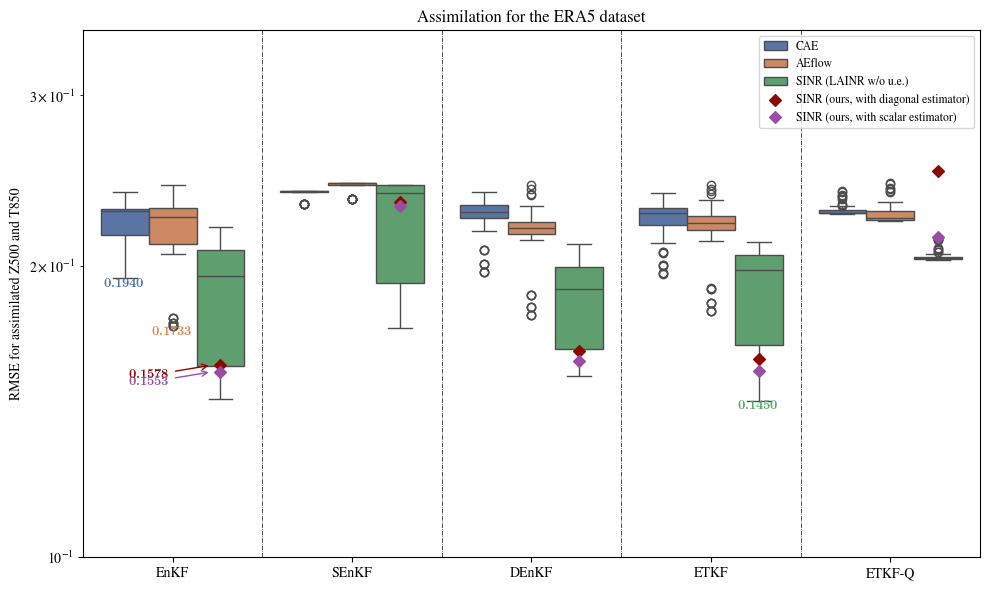

In [26]:
box_plot_rename = {
    # 'CAE+ReZero': 'CAE+ReZero',
    'CAE+NeuralODE': 'CAE',
    # 'AEflow+ReZero': 'AEflow+ReZero',
    'AEflow+NeuralODE': 'AEflow',
    # 'SINR+ReZero': 'SINR+ReZero',
    'SINR+NeuralODE': 'SINR (LAINR w/o u.e.)',
}
ue_rename = {
    'SINR+NeuralODE+diagonal': 'SINR (ours, with diagonal estimator)',
    'SINR+NeuralODE+scalar': 'SINR (ours, with scalar estimator)',
}

palette_name = 'deep'

df_plot = df_avg_rmse[df_avg_rmse['ens_num'] == 64]

# df_plot = df_plot[df_plot['sigma_m'] > 5e-4]

print(df_plot['model'].unique())

df_boxplot = pd.concat([
    df_plot[df_plot['model'] == model_name]
    for model_name in box_plot_rename.keys()
])
df_boxplot['plotname'] = df_boxplot['model'].map(box_plot_rename)

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(df_boxplot, x='kf_name', y='rmse',
                 hue='plotname', palette='deep',
                 #  whis=(0, 100),
                 ax=ax)

colors = sns.palettes.color_palette(palette_name)
colors_ue = [sns.palettes.color_palette('dark')[3], sns.palettes.color_palette('Set1')[3]]

# annotate the minimal value for each model
models = df_boxplot['plotname'].unique()
for k in range(len(models)):

    color = colors[k]
    xoffset = -.4 + .4 / len(models) * (2 * k + 1)
    model = models[k]

    df_model = df_boxplot[df_boxplot['plotname'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color=color,
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

models_ue = ue_rename.keys()
for k, model in enumerate(models_ue):

    color = colors_ue[k]

    xlocs = []
    ylocs = []

    df_anno = df_plot[df_plot['model'] == model]
    # add diagonal estimator
    for xtick in ax.get_xticks():
        # idx = df[df['error']==min_value[xtick]].index.values
        df_anno_value = df_anno[df_anno['kf_name'] == df_plot['kf_name'].unique()[xtick]]['rmse'].min()

        print(df_anno_value)
        xlocs.append(xtick + .4 - .8 / len(models) / 2)
        ylocs.append(df_anno_value)

    ax.scatter(xlocs, ylocs, marker='D', color=color, label=ue_rename[model], zorder=100)

    # add diagonal estimator minimum
    min_idx = df_anno['rmse'].argmin()
    min_row = df_anno.iloc[min_idx]
    min_value = min_row['rmse']
    min_kf_idx = list(df_anno['kf_name'].unique()).index(min_row['kf_name'])
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(min_kf_idx + .4 - .8 / len(models) / 2 - .05, min_value),
                xytext=(-30, -3),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=color),
                ha='right', va='top', color=color,
                # weight='bold',
                usetex=True,
                )
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')

for model in df_boxplot['plotname'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_boxplot[df_boxplot["plotname"]==model][column_name].unique()}')

ax.set_yscale('log')
ax.set_ylim(.1, .35)
ax.set_xlabel('')
ax.set_ylabel('RMSE for assimilated Z500 and T850')
ax.set_title('Assimilation for the ERA5 dataset')
ax.legend(fontsize='small')
for x in ax.get_xticks()[:-1]:
    ax.axvline(x + .5, color='k', linestyle='-.', linewidth=.5)
ax.set_xlim(-.5, 4.5)
plt.tight_layout()
plt.savefig('era5_assimilate_boxplot_neuralode.pdf', bbox_inches='tight')